# Get top Video Games through Gamespot API


### ABSTRACT


We are working on a video game dataset and will be extracting video game data from 3 different data sources and then will be munging them together to form a consistent dataset. We will perform several operations over the dataset extracted to make the data clean and error free and consistent. After that we will be developing a database from using the extracted source data and display it in the form of an Entity-Relationship Diagram.
The dataset used is the vgchartz.com. It contains details about Video Game ratings, genres, publisher and year of release.

## Importing Libraries

In [1]:
import requests
import pandas as pd
import json
import os
import rawgpy
from bs4 import BeautifulSoup
import numpy as np

### DATA SOURCE 1: Using Web Scraping using Beautiful Soup

### What is Beautiful Soup?

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


### The site we are going to use is http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0. Please visit the link to get information on what is being scrapped.



In [2]:
# Fetching the tags from the website
url = 'http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0'
html = requests.get(url, headers = {'User-Agent':'Mozilla/5.0'})
print(html.status_code) 
# Printing the status code, 200 means the request has succeeded

200


In [3]:
#Displaying the above format to more readable format using html parser
soup = BeautifulSoup(html.content, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<!-- VGCHARTZ MAIN HEADER TAGS -->
<!-- Venatus Market Ad-Manager (vgchartz.com) -->
<script>
    (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
    </script>
<!-- / Venatus Market Ad-Manager (vgchartz.com) -->
<meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
<script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
<script type="text/java

In [4]:
# We will be extracting Rank, Name, Platform and Publisher from vgchartz.com 
k=[] 
rank=[]
gname=[]
publisher=[]
platform=[]
release_date=[]
# Retrieving values using a for loop
for tag in soup.find_all('a'):
    if tag['href'].startswith('http://www.vgchartz.com/game/'):
        k.append(tag.get_text().strip())
        data=tag.parent.parent.find_all('td')
        if data!=[]:
            rank.append(np.int32(data[0].string))
            platform.append(data[3].find('img').attrs['alt'].strip(' '))
            publisher.append(data[4].string.strip(' '))
gname = k[10:] # Our data starts from index position 10 onwards
# Creating a dictionary to store the column names for the dataframe
columns = {
    'Id': rank,
    'Name':gname,
    'Platform':platform,
    'Publisher':publisher
}
df = pd.DataFrame(columns) # Creating a dataframe with column names Rank, Name, Platform and Publisher.
df = df[[
    'Id', 'Name', 'Platform',
    'Publisher']]
# Saving the obtained dataframe on a file named vgsales.csv
df.to_csv("vgsales.csv", sep=",", encoding='utf-8', index=False) # Saves the data to .csv file
#df.drop_duplicates(subset ="Name",keep = False, inplace = True)
df

,Id,Name,Platform,Publisher
0,1,Resident Evil,Series,Capcom
1,2,Wii Sports,Wii,Nintendo
2,3,Halo,Series,Microsoft Game Studios
3,4,Monster Hunter,Series,Capcom
4,5,Street Fighter,Series,Capcom
...,...,...,...,...
195,196,Euro Truck Simulator 2,PC,SCS Software
196,197,Mario Kart: Super Circuit,GBA,Nintendo
197,198,Super Mario Sunshine,GC,Nintendo
198,199,LittleBigPlanet,PS3,Sony Computer Entertainment


### Printing the information of the top first rated movie

In [5]:
gname[0]

'Resident Evil'

In [6]:
print(df.isnull().any())
print(df.columns)

Id           False
Name         False
Platform     False
Publisher    False
dtype: bool
Index(['Id', 'Name', 'Platform', 'Publisher'], dtype='object')


## DATASOURCE 2 - Using Raw Data

In [7]:
df2 = pd.read_csv('vgsales2019.csv')
#df2.drop(['Rank','ESRB_Rating','Platform','Publisher','Developer','User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace= True)

### Displaying the output

In [8]:
df2.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


### Checking the information of the data - data type and total number of records in each column

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
Rank             55792 non-null int64
Name             55792 non-null object
Genre            55792 non-null object
ESRB_Rating      23623 non-null object
Platform         55792 non-null object
Publisher        55792 non-null object
Developer        55775 non-null object
Critic_Score     6536 non-null float64
User_Score       335 non-null float64
Total_Shipped    1827 non-null float64
Global_Sales     19415 non-null float64
NA_Sales         12964 non-null float64
PAL_Sales        13189 non-null float64
JP_Sales         7043 non-null float64
Other_Sales      15522 non-null float64
Year             54813 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


### How to find the missing values

In [10]:
# checking missing, NaN data in the dataframe through CSV
df2.isnull().any()

Rank             False
Name             False
Genre            False
ESRB_Rating       True
Platform         False
Publisher        False
Developer         True
Critic_Score      True
User_Score        True
Total_Shipped     True
Global_Sales      True
NA_Sales          True
PAL_Sales         True
JP_Sales          True
Other_Sales       True
Year              True
dtype: bool

### Checking the total null values in the column using sum() function

In [11]:
df2.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

### Checking the shape of the data

In [12]:
df2.shape

(55792, 16)

### Checking the columns present in the data

In [13]:
df2.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year'],
      dtype='object')

In [14]:
df2.drop(['Rank'],axis=1, inplace= True)
#df2.head(100)
#print(df2.columns)

In [15]:
# Merging the two dataframe df and dframe having unique names
gameData = pd.merge(df,df2, 
                 on = 'Name')

In [16]:
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0
1,1,Resident Evil,Series,Capcom,Action,M,GC,Capcom,Capcom,8.9,NaN,1.35,NaN,NaN,NaN,NaN,NaN,2002.0
2,1,Resident Evil,Series,Capcom,Action,M,SAT,Capcom,Nextech,7.3,NaN,NaN,0.17,NaN,NaN,0.17,NaN,1997.0
3,1,Resident Evil,Series,Capcom,Action,M,PC,Virgin Interactive,Capcom,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.0
4,1,Resident Evil,Series,Capcom,Misc,NaN,DS,Capcom,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,198,Super Mario Sunshine,GC,Nintendo,Platform,E,GC,Nintendo,Nintendo EAD,9.2,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2002.0
556,199,LittleBigPlanet,PS3,Sony Computer Entertainment,Platform,E,PS3,Sony Computer Entertainment,Media Molecule,9.4,9.2,NaN,5.85,2.80,2.01,0.17,0.87,2008.0
557,199,LittleBigPlanet,PS3,Sony Computer Entertainment,Platform,E,PSP,Sony Computer Entertainment,SCEE Cambridge,8.8,NaN,NaN,2.61,0.65,1.27,0.01,0.68,2009.0
558,199,LittleBigPlanet,PS3,Sony Computer Entertainment,Platform,E,PSN,Sony Computer Entertainment,Media Molecule,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0


In [17]:
gameData.to_csv("GameData.csv",encoding="utf-8",index=False)

In [18]:
gameData.drop_duplicates(subset ="Name",keep = "first", inplace = True)
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0
8,2,Wii Sports,Wii,Nintendo,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
9,4,Monster Hunter,Series,Capcom,Role-Playing,M,PS2,Capcom,Capcom,NaN,NaN,NaN,0.50,0.11,0.08,0.28,0.03,2004.0
12,5,Street Fighter,Series,Capcom,Misc,NaN,TG16,NEC Avenue,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0
14,6,Super Mario Bros.,NES,Nintendo,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,196,Euro Truck Simulator 2,PC,SCS Software,Simulation,NaN,PC,SCS Software,SCS Software,8.5,NaN,5.98,NaN,NaN,NaN,NaN,NaN,2013.0
553,197,Mario Kart: Super Circuit,GBA,Nintendo,Racing,E,GBA,Nintendo,Intelligent Systems,9.3,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2001.0
555,198,Super Mario Sunshine,GC,Nintendo,Platform,E,GC,Nintendo,Nintendo EAD,9.2,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2002.0
556,199,LittleBigPlanet,PS3,Sony Computer Entertainment,Platform,E,PS3,Sony Computer Entertainment,Media Molecule,9.4,9.2,NaN,5.85,2.80,2.01,0.17,0.87,2008.0


In [19]:
print(len(gameData))
#for i in range(len(result)):
    #gen.setdefault(result["Name"][i], {})[result["Genre"][i]] = ''
    #To eliminate the duplication of key-value pairs
    #plat.setdefault(result["Name"][i], {})[result["Platform"][i]] = ''  

161


In [20]:
#result.drop_duplicates(subset ="Name",keep = 'first', inplace = True)

In [21]:
#critic_score = gameData['Critic_Score']
#Id = gameData['Rank']
#year = gameData['Year']
#genre = gen.values()
#final = pd.DataFrame(columns = ['ID','Name', 'Genre', 'Platform',
                              # 'Critic_Score', 'RAWG.IO Ratings',
                               # 'Rank', 'Year' ])

## DATASOURCE 3 - Using API

#### What is an API:

API stands for Application Programming Interface, and it lets developers integrate any two parts of an application or any different applications together. It consists of various elements such as functions, protocols, and tools that allow developers to build applications. A common goal of all types of APIs is to accelerate the development of applications by providing a part of its functionality out-of-the-box, so developers do not have to implement it themselves.

We will be using an API Wrapper to get data from the video game database www.rawg.io. Since it's a public database we won't be requiring an API key for using www.rawg.io's API.
We will be importing the API wrapper python class for www.rawg.io, which is rawgpy.

### Importing the libraries rawgpy 

In [22]:
import rawgpy 
import json

#### We will be using the data obtained from the Web Scraping to search through rawgpy.io to get ratings of the game. The ratings will be on a scale of 5. 

In [23]:
# Storing the names of the game on gname
gname = gameData['Name']
# First initiate two empty list for storing the raw data
rawg_ratings = []
description = []

In [24]:
rawg = rawgpy.RAWG("User-Agent, this should identify your app")
for name in gname:
    results = rawg.search(name)  # defaults to returning the top 5 results
    game = results[0] # selects the first result of the search
    game.populate() # get additional information on the game
    rawg_ratings.append(game.rating)
    # Since description has <p> and </p>, we will replace it with ""
    desc = game.description.replace("</p>","")
    description.append(desc.replace("<p>",""))
print (len(rawg_ratings))
print(len(description))

161
161


In [25]:
gameData["RAWG Score"] = rawg_ratings
gameData["Description"] = description
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,RAWG Score,Description
0,1,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0,4.32,The police of a small town are trying to find ...
8,2,Wii Sports,Wii,Nintendo,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,4.20,This is what video games should be: fun for ev...
9,4,Monster Hunter,Series,Capcom,Role-Playing,M,PS2,Capcom,Capcom,NaN,NaN,NaN,0.50,0.11,0.08,0.28,0.03,2004.0,0.00,Monster Hunter is an arcade game developed by ...
12,5,Street Fighter,Series,Capcom,Misc,NaN,TG16,NEC Avenue,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0,3.00,"Street Fighter (ストリートファイター, Sutorīto Faitā) is..."
14,6,Super Mario Bros.,NES,Nintendo,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,4.27,Mario and Luigi star in their first ever Mushr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,196,Euro Truck Simulator 2,PC,SCS Software,Simulation,NaN,PC,SCS Software,SCS Software,8.5,NaN,5.98,NaN,NaN,NaN,NaN,NaN,2013.0,4.02,"You play as a truck driver, whose primary task..."
553,197,Mario Kart: Super Circuit,GBA,Nintendo,Racing,E,GBA,Nintendo,Intelligent Systems,9.3,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2001.0,3.83,"Mario Kart: Super Circuit, known in Japan as M..."
555,198,Super Mario Sunshine,GC,Nintendo,Platform,E,GC,Nintendo,Nintendo EAD,9.2,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2002.0,4.31,"When Mario, Peach, and an entourage of Peach's..."
556,199,LittleBigPlanet,PS3,Sony Computer Entertainment,Platform,E,PS3,Sony Computer Entertainment,Media Molecule,9.4,9.2,NaN,5.85,2.80,2.01,0.17,0.87,2008.0,4.06,LPB is a pseudo-3d puzzler-platformer exclusiv...


### Cleaning and auditing the data in gameData

### How to find missing values

In [26]:
# checking missing, NaN data in the dataframe 
gameData.isnull().any()
description[0]

'The police of a small town are trying to find the cause of numerous brutal murders. The details of these murders are so monstrous that the police are requesting help from the federal authorities. A special squad arrives in the town, then another one. As a result, all roads converge to a mansion in which the surviving fighters of special forces find the cause of all incidents - aggressive zombies and mutants. These devils of hell, by all indications, until recently were people. It turns out that they have been changed by experiments conducted to obtain new weapons. But regardless of the reason, all monsters should be destroyed.<br />\nThe game takes place in a mansion and in a dungeon near this mansion. Soldiers of special forces clear all these spaces from monsters. Everywhere there are disguised, hidden spaces, which can be opened only by taking separate efforts. Fighters also encounter a variety of mechanisms, which they can neutralize, and even a mutant plant. All this is not inclu

### Checking the total null values in the column using sum() function

In [27]:
gameData.isnull().sum()

Id                 0
Name               0
Platform_x         0
Publisher_x        0
Genre              0
ESRB_Rating       15
Platform_y         0
Publisher_y        0
Developer          0
Critic_Score      28
User_Score       132
Total_Shipped     58
Global_Sales     105
NA_Sales         106
PAL_Sales        106
JP_Sales         110
Other_Sales      105
Year               0
RAWG Score         0
Description        0
dtype: int64

### Dropping all columns which have large numbers of missing values

In [28]:
gameData.drop(['ESRB_Rating','Platform_x', 'Publisher_x','Developer',
          'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 
          'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace= True)


### Removing all records having null values

In [29]:
gameData.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# Checking the null values
gameData.isnull().sum()

Id              0
Name            0
Genre           0
Platform_y      0
Publisher_y     0
Critic_Score    0
Year            0
RAWG Score      0
Description     0
dtype: int64

### Checking shape of the data

In [30]:
gameData.shape

(133, 9)

### Checking the entities present in the database

In [31]:
gameData.columns

Index(['Id', 'Name', 'Genre', 'Platform_y', 'Publisher_y', 'Critic_Score',
       'Year', 'RAWG Score', 'Description'],
      dtype='object')

### Checking that attribute Rank is unique or not 

In [32]:
gameData['Id'].is_unique

True

### Checking the information of the data - data type and total number of records in each column

In [33]:
gameData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 556
Data columns (total 9 columns):
Id              133 non-null int64
Name            133 non-null object
Genre           133 non-null object
Platform_y      133 non-null object
Publisher_y     133 non-null object
Critic_Score    133 non-null float64
Year            133 non-null float64
RAWG Score      133 non-null float64
Description     133 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 10.4+ KB


## Technique to use visualization to understand the data better

Here we are using seaborn, matplotlib and scipy to analyse our dataset

In [34]:
# Importing liabries used for visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### We use the Critic_Score and RAWG Score from our dataframe to illustrate how the vote count is distributed in the data set

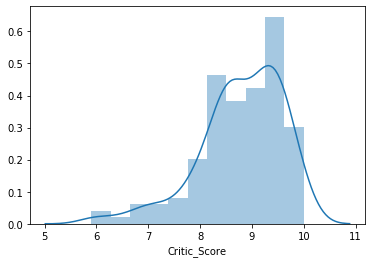

In [35]:
critic = gameData['Critic_Score']

sns.distplot(critic)

### From the result we can see that the Critic Score is not normally distributed. Most of the scores lie between 8 and 9.5.

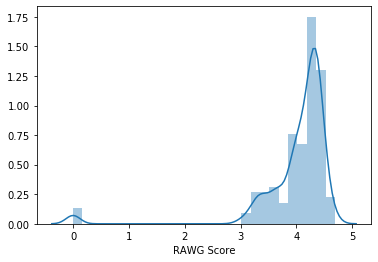

In [36]:
rawg_score = gameData['RAWG Score']
sns.distplot(rawg_score)

### Here also, the we can see that RAWG Score is not normally distributed. Most of the games in the dataframe have a score of 4.5.

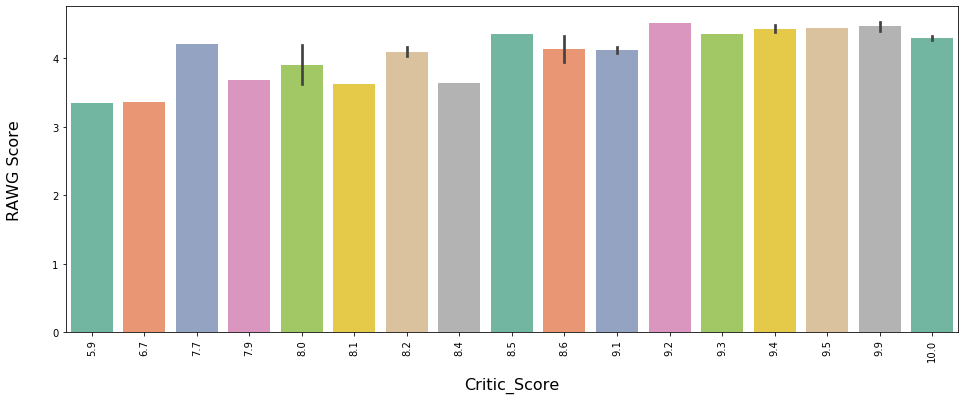

In [37]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x= 'Critic_Score', y='RAWG Score', data=gameData.head(25), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

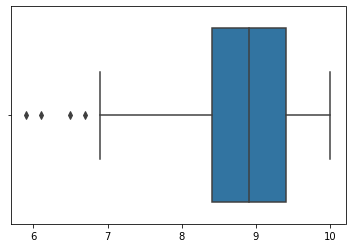

In [38]:
sns.boxplot(np.array(gameData['Critic_Score']))

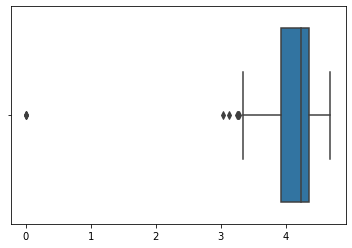

In [39]:
sns.boxplot(np.array(gameData['RAWG Score']))

## CONCEPTUAL MODEL

## Generating Tables by reformatting data

In [40]:
# Fetching datas of Video Games 
Game_title = gameData.loc[:,['Id', 'Name', "Description", 'Year']]
Game_title

,Id,Name,Description,Year
0,1,Resident Evil,The police of a small town are trying to find ...,1996.0
8,2,Wii Sports,This is what video games should be: fun for ev...,2006.0
14,6,Super Mario Bros.,Mario and Luigi star in their first ever Mushr...,1985.0
18,7,Mario Kart Wii,,2008.0
24,10,Minecraft,"One of the most popular games of the 2010s, Mi...",2010.0
...,...,...,...,...
551,195,Metal Gear Solid 4: Guns of the Patriots,Metal Gear Solid 4: Guns of the Patriots is a ...,2008.0
552,196,Euro Truck Simulator 2,"You play as a truck driver, whose primary task...",2013.0
553,197,Mario Kart: Super Circuit,"Mario Kart: Super Circuit, known in Japan as M...",2001.0
555,198,Super Mario Sunshine,"When Mario, Peach, and an entourage of Peach's...",2002.0


In [41]:
# Created a Game_Ratings table using the below columns
Game_Ratings = gameData.loc[:,['Name', 'RAWG Score', 'Critic_Score']]
Game_Ratings

,Name,RAWG Score,Critic_Score
0,Resident Evil,4.32,8.6
8,Wii Sports,4.20,7.7
14,Super Mario Bros.,4.27,10.0
18,Mario Kart Wii,4.16,8.2
24,Minecraft,4.33,10.0
...,...,...,...
551,Metal Gear Solid 4: Guns of the Patriots,4.37,9.3
552,Euro Truck Simulator 2,4.02,8.5
553,Mario Kart: Super Circuit,3.83,9.3
555,Super Mario Sunshine,4.31,9.2


In [ ]:
# Created a table 